### Heart attack predictions

### About this dataset

In [21]:
## pandas 
import pandas as pd
import numpy as np
## visualizations
import seaborn as sns
import matplotlib.pyplot as plt

## other
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### Importing the data

In [91]:
df = pd.read_csv('heart.csv')
sat = pd.read_csv('o2Saturation.csv')

In [92]:
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [93]:
print(sat.shape)
# sat.head()

(3585, 1)


In [94]:
# ex_list = ['yes','no']
# ex_id = [1,0]
# cp_list = ['typical angina','atypical angina','non-anginal pain','asymptomatic']
# cp_id = [0,1,2,3]

In [95]:
# df['exng'].replace(ex_id,ex_list,True)

In [96]:
# df['cp'].replace(cp_id,cp_list,True)

### Info on the data

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [98]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [99]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1    165
0    138
Name: output, dtype: int64


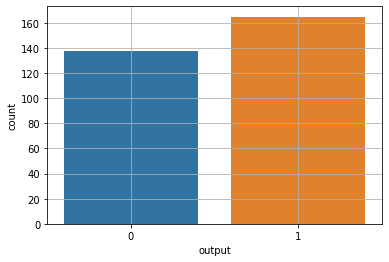


% values
1    54.46
0    45.54
Name: output, dtype: float64


In [100]:
sns.countplot(df.output)
print(df.output.value_counts())
plt.grid()
plt.show()
print('\n% values')
print(round(df.output.value_counts(normalize=True)*100,2))

In [101]:
for i in df.columns:
    print(i,':',df[i].nunique())

age : 41
sex : 2
cp : 4
trtbps : 49
chol : 152
fbs : 2
restecg : 3
thalachh : 91
exng : 2
oldpeak : 40
slp : 3
caa : 5
thall : 4
output : 2


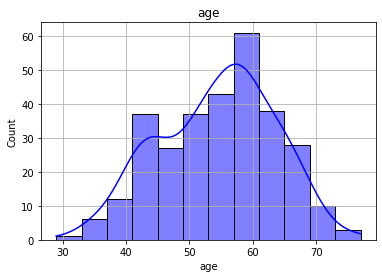

------------------------------------------------------------


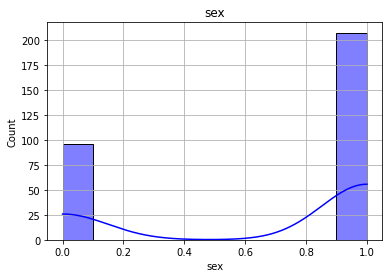

------------------------------------------------------------


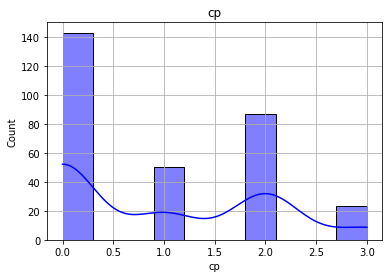

------------------------------------------------------------


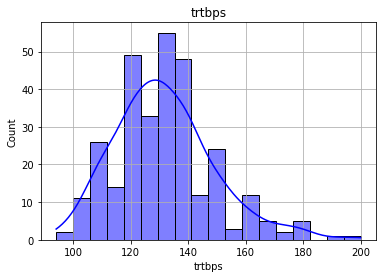

------------------------------------------------------------


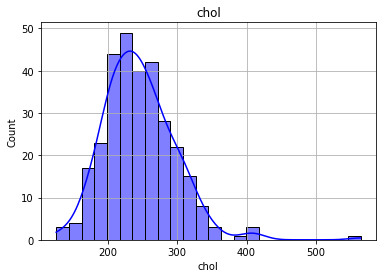

------------------------------------------------------------


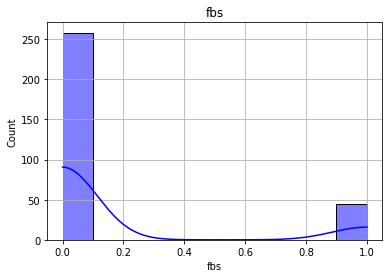

------------------------------------------------------------


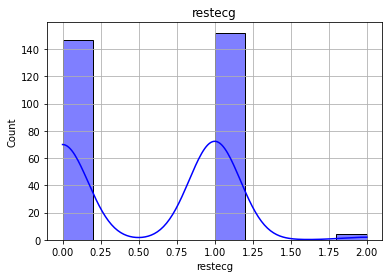

------------------------------------------------------------


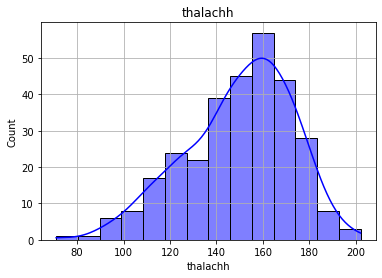

------------------------------------------------------------


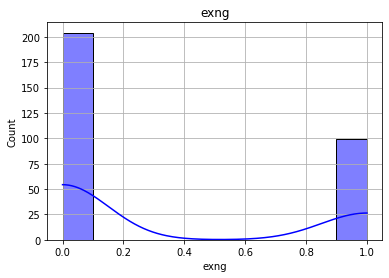

------------------------------------------------------------


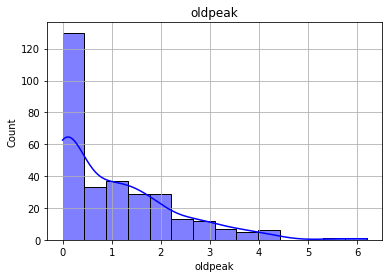

------------------------------------------------------------


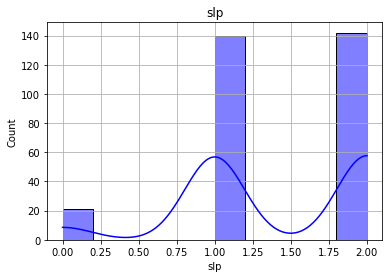

------------------------------------------------------------


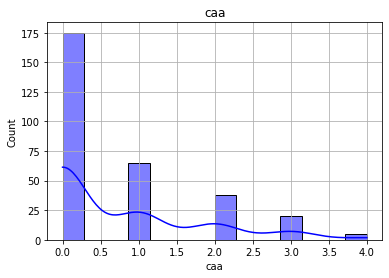

------------------------------------------------------------


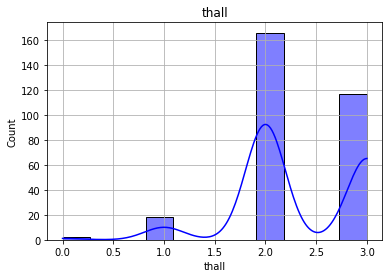

------------------------------------------------------------


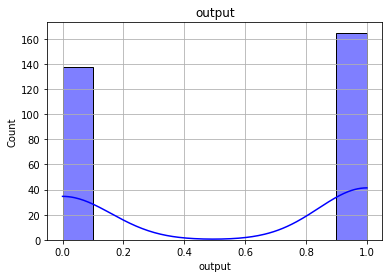

------------------------------------------------------------


In [102]:
for i in df.columns:
    if df.astype != 'O':
        sns.histplot(df[i],kde=True,color='b')
        plt.title(i)
        plt.grid()
        plt.show()
        print('---'*20)

### Analysis and feature engineering

In [121]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


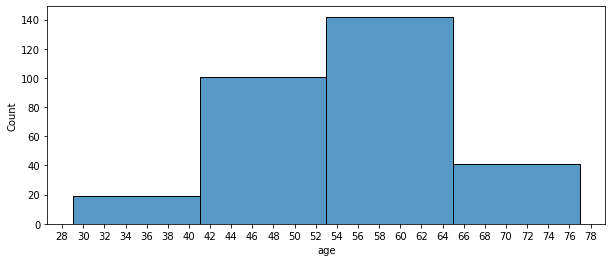

In [138]:
plt.figure(figsize=(10,4))
sns.histplot(df.age,fill=True,bins=4)
plt.xticks(np.arange(28,80,2))
plt.show()

In [139]:
ac = []
for i in df.age:
    if i < 42:
        ac.append('young')
    elif 42 <= i < 54:
        ac.append('middle age')
    elif 54 <= i < 66:
        ac.append('upper middle age')
    elif i > 65:
        ac.append('old')
df['age_catg'] = ac

In [140]:
col = df.pop('age_catg')
df.insert(1,'age_catg',col)

In [141]:
df.head()

,age,age_catg,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,upper middle age,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,young,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,young,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,upper middle age,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,upper middle age,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Count of male and female who have the risk of a heart attack

In [118]:
sex_op = pd.DataFrame(df.sex.groupby(df.output).value_counts(normalize=False))

In [117]:
pr = round(sex_op['sex']*100,2)

In [119]:
sex_op['percentage'] = pr

In [142]:
sex_op

sex  percentage
output sex                 
0      1    114       82.61
       0     24       17.39
1      1     93       56.36
       0     72       43.64

### Inference : 82% of people who dont have the risk of heart attack are 1s. 18% are 0s. 56% of people who have the risk of a heart attack are 1s. remaining 43 % are 0's.

### Average age of people with and without the risk of a heart attack and their gender

In [164]:
pd.DataFrame(df.groupby(['output','sex']).mean())['age']

output  sex
0       0      59.041667
        1      56.087719
1       0      54.555556
        1      50.903226
Name: age, dtype: float64

### Inference : surprisingly, the average age of people who have a risk is lower than the average age of people who do not have a risk (in both genders). In other words, Younger people in both genders have a higher risk of a heart attack than the elder people.

### Average cholestrol levels of the people with and without the risk of a heart attack and their gender

In [165]:
pd.DataFrame(df.groupby(['output','sex']).mean())['chol']

output  sex
0       0      274.958333
        1      246.061404
1       0      256.750000
        1      230.989247
Name: chol, dtype: float64

### Inference : another surprising inference is that the cholestrol levels of both genders having the risk of a  heart attack is lower than both genders of those who don't.

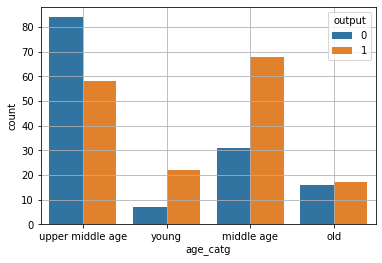

In [146]:
sns.countplot(df.age_catg,hue=df.output)
plt.grid()
plt.show()